In [1]:
# Importing some necessary libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [3]:
df = pd.read_csv("heart (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Exploratory Data Analysis
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<Axes: xlabel='target'>

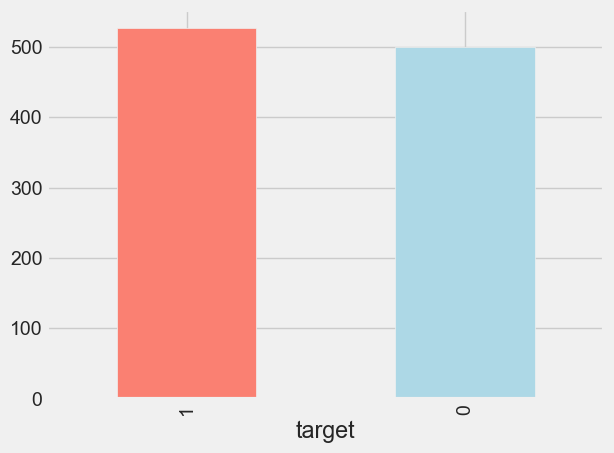

In [5]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [6]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
categorical_val = []
continous_val = []
for column in df.columns:
 print('==============================')
 print(f"{column} : {df[column].unique()}")
 if len(df[column].unique()) <= 10:
     categorical_val.append(column)
 else:
     continous_val.append(column)


age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

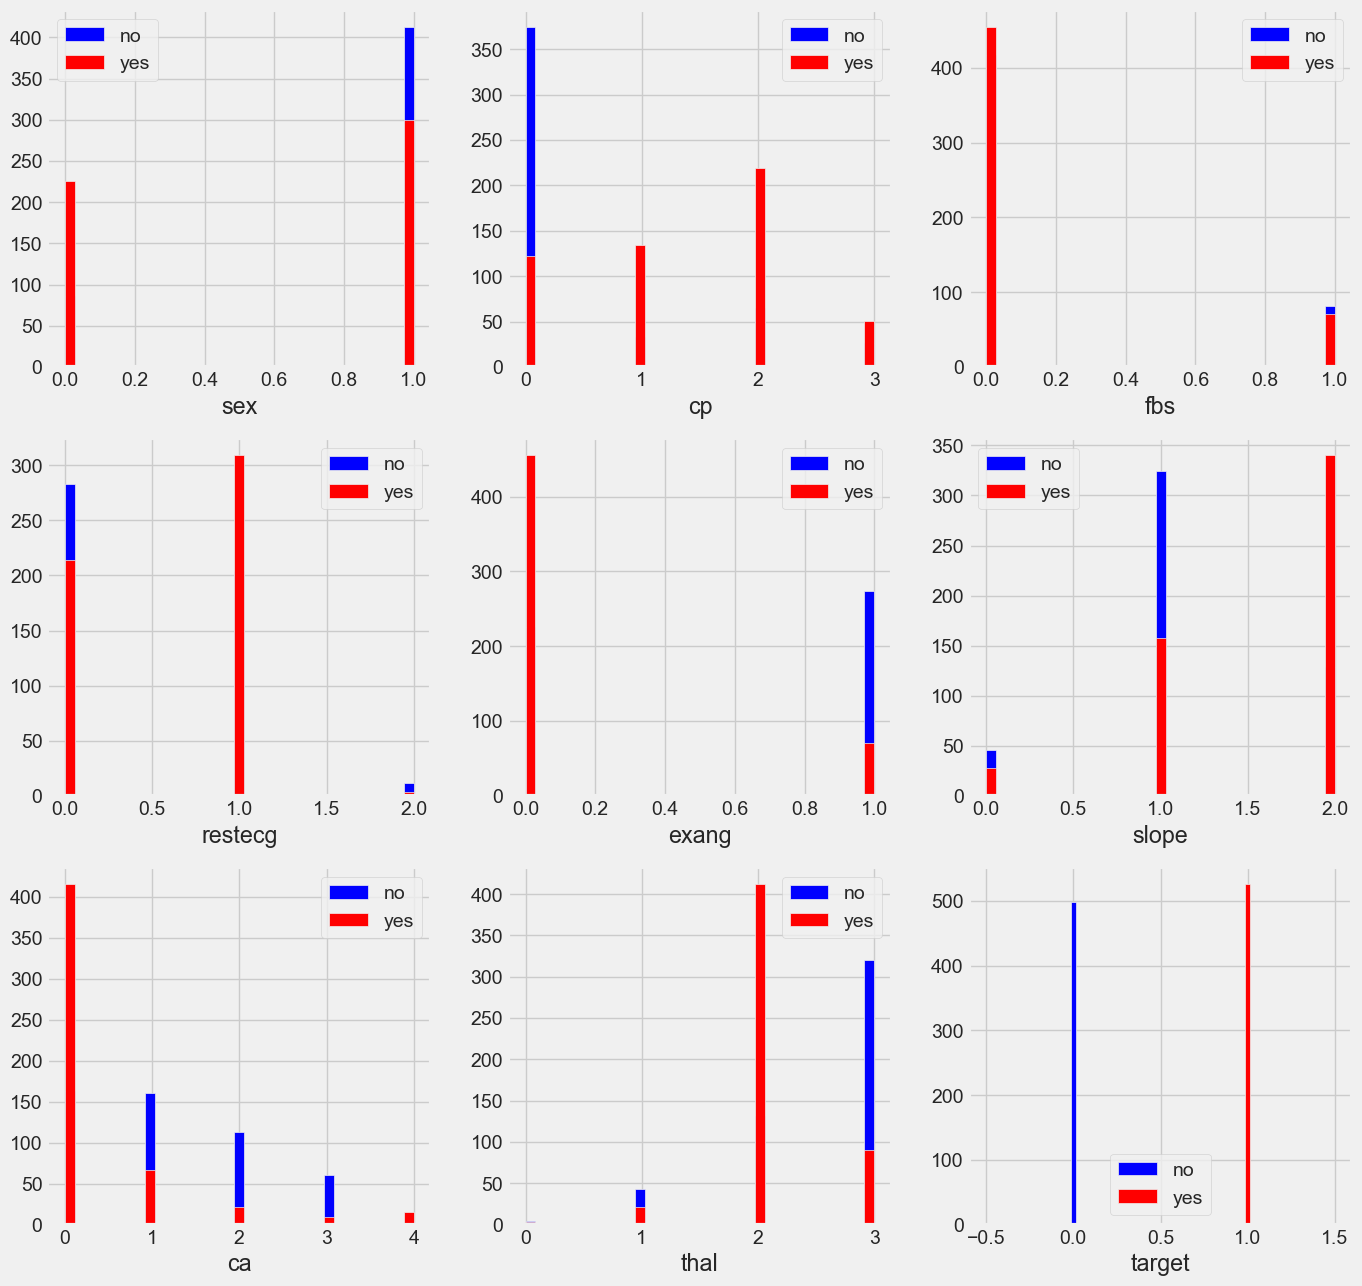

In [8]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='no')
    df[df["target"] == 1][column].hist(bins=35, color='red', label='yes')
    plt.legend()
    plt.xlabel(column)

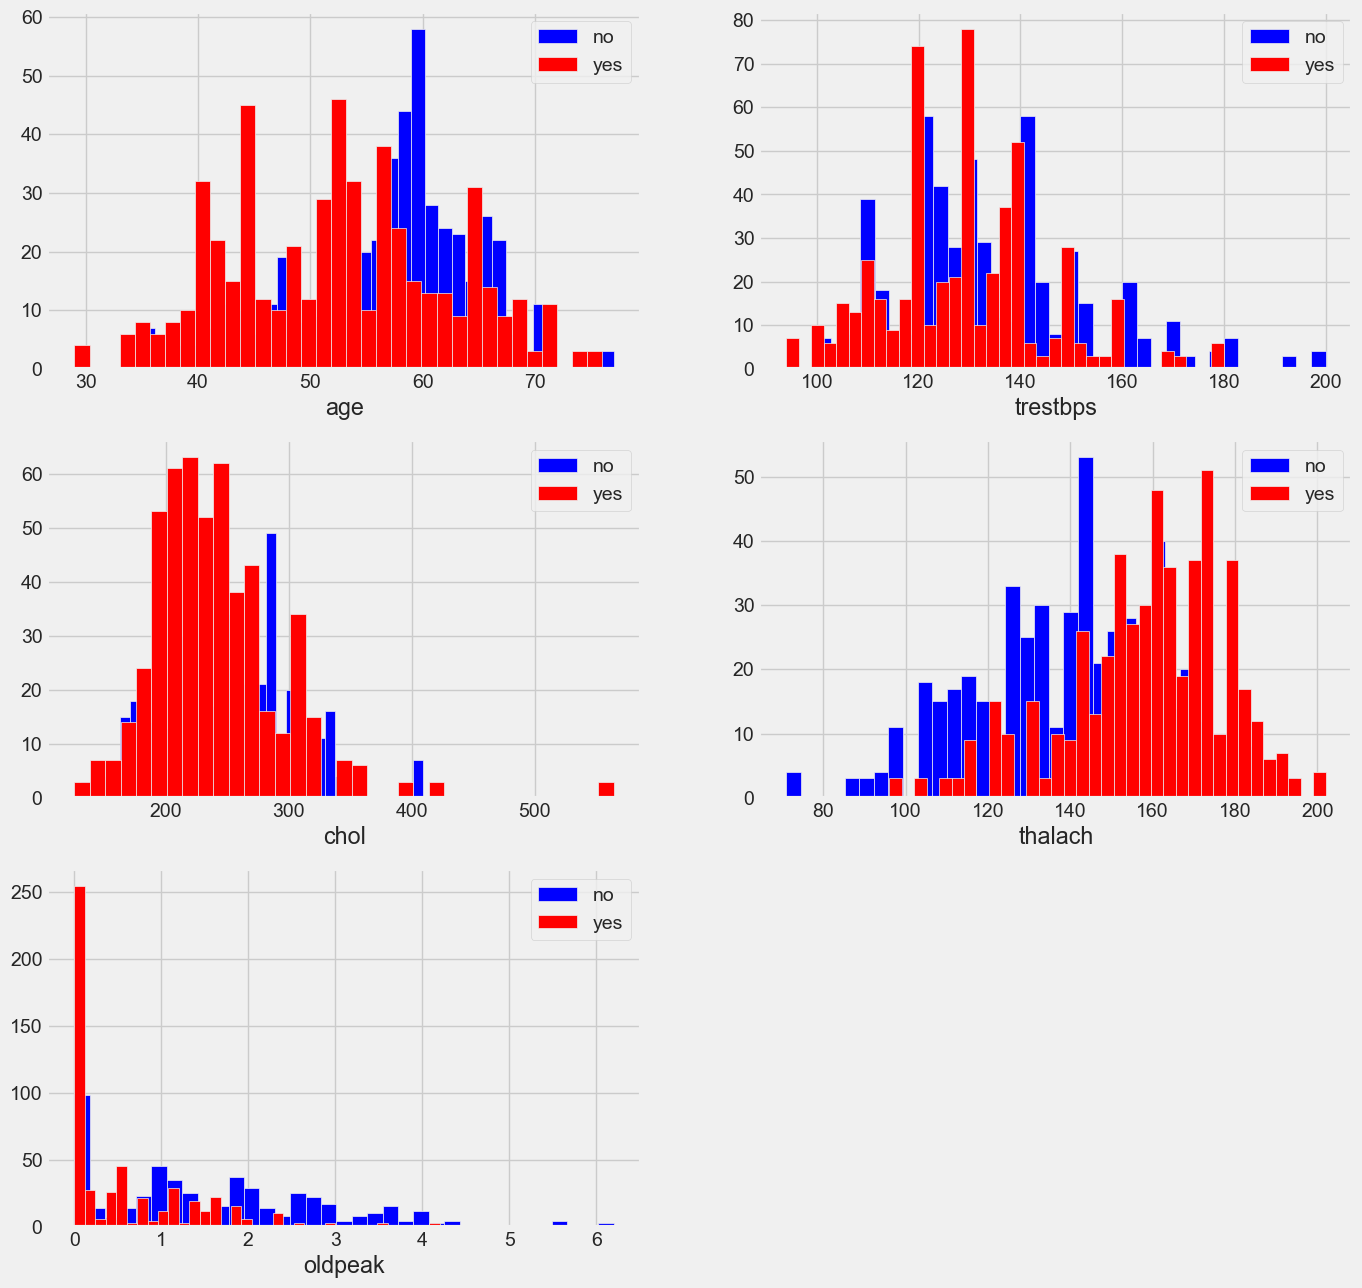

In [9]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
 plt.subplot(3, 2, i)
 df[df["target"] == 0][column].hist(bins=35, color='blue', label='no')
 df[df["target"] == 1][column].hist(bins=35, color='red', label='yes')
 plt.legend()
 plt.xlabel(column)

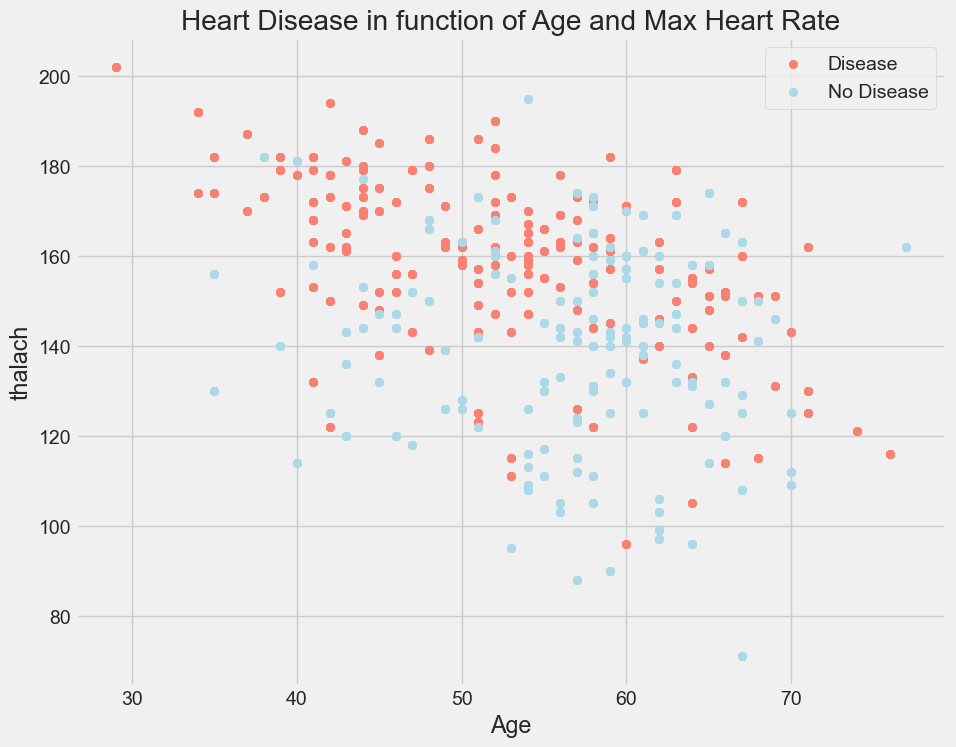

In [10]:
# Create another figure
plt.figure(figsize=(10, 8))
# Scatter with postivie examples
plt.scatter(df.age[df['target']==1],
 df['thalach'][df['target']==1],
 c="salmon")
# Scatter with negative examples
plt.scatter(df.age[df['target']==0],
 df['thalach'][df['target']==0],
 c="lightblue")
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("thalach")
plt.legend(["Disease", "No Disease"]);

(14.5, -0.5)

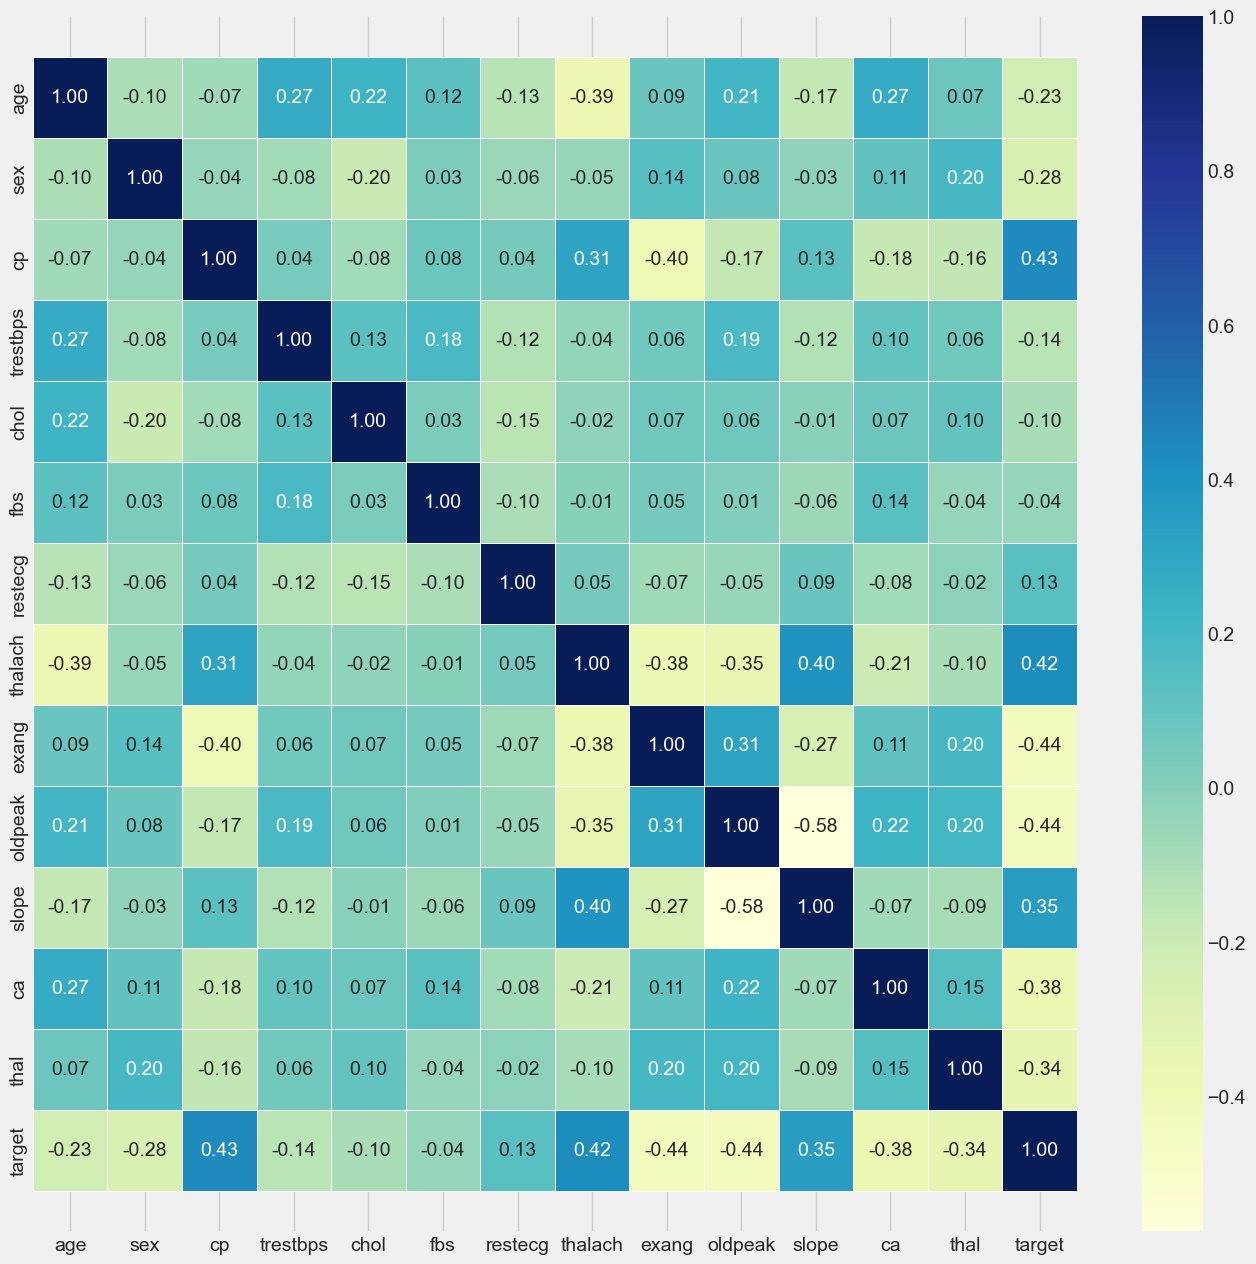

In [11]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: >

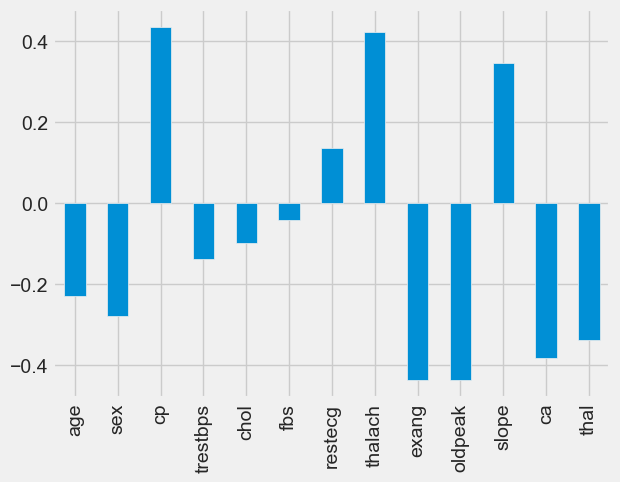

In [13]:
df.drop('target', axis=1).corrwith(df['target']).plot(kind='bar', grid=True)


In [15]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart (1).csv')
# Now you can proceed with your code
target = 'target'  # Replace with your actual target column name
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.80,2,3,2
137,64,0,0,180,325,0,1,154,1,0.00,2,0,2
534,54,0,2,108,267,0,0,167,0,0.00,2,0,2
495,59,1,0,135,234,0,1,161,0,0.50,1,0,3
244,51,1,2,125,245,1,0,166,0,2.40,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.00,1,0,2
71,61,1,0,140,207,0,0,138,1,1.90,2,1,3
106,51,1,0,140,299,0,1,173,1,1.60,2,0,3
270,43,1,0,110,211,0,1,161,0,0.00,2,0,3


In [17]:
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test),columns=X.columns)

In [22]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfc.feature_importances_})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(14)
print(top_features)
X_train=X_train[top_features['Feature']]
X_test=X_test[top_features['Feature']]

     Feature  Importance
2         cp        0.14
11        ca        0.13
7    thalach        0.12
9    oldpeak        0.12
12      thal        0.11
0        age        0.08
4       chol        0.07
3   trestbps        0.07
8      exang        0.06
10     slope        0.05
1        sex        0.03
6    restecg        0.02
5        fbs        0.01


In [26]:
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier  # Import XGBClassifie

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
}

accuracies={} # Dictionary to store accuracies
for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred).round(2)
    accuracies[name] = accuracy # Stored under the model's name
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

# Convert the accuracies dictionary to a DataFrame
accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])



Training Logistic Regression...
Logistic Regression Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



Training Decision Tree...
Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Training Random Forest...


D:\GCET\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Training SVM...
SVM Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205

